## Group Name:Group 6

**Members:   
101305221 Ling Cheng   
101170562 Yi Hu   
101335635 Mingqian Zhou 
101300872 Chengcheng Cheng   
101328455 Pema Singye**

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline

from pathlib import Path

import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

## 1. Data Exploration

In [2]:
BathSoap_df = pd.read_csv('BathSoapHousehold.csv')
BathSoap_df

,Member id,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,...,PropCat 6,PropCat 7,PropCat 8,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15
0,1010010,4,3,10,1,4,4,2,4,1,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028037,0.000000,0.130841,0.339564
1,1010020,3,2,10,2,2,4,4,2,1,...,0.347048,0.026834,0.016100,0.014311,0.000000,0.059034,0.000000,0.000000,0.080501,0.000000
2,1014020,2,3,10,2,4,5,6,4,1,...,0.121212,0.033550,0.010823,0.008658,0.000000,0.000000,0.016234,0.000000,0.561688,0.003247
3,1014030,4,0,0,0,4,0,0,5,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.600000,0.000000
4,1014190,4,1,10,2,3,4,4,3,1,...,0.000000,0.000000,0.048193,0.000000,0.000000,0.000000,0.000000,0.000000,0.144578,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1167090,2,3,10,2,4,5,5,4,1,...,0.000000,0.000000,0.000000,0.000000,0.024931,0.897507,0.000000,0.000000,0.000000,0.000000
596,1167230,3,3,10,2,3,5,4,4,1,...,0.430693,0.074257,0.148515,0.000000,0.039604,0.000000,0.000000,0.089109,0.000000,0.049505
597,1167340,3,3,17,2,4,4,9,4,1,...,0.127148,0.000000,0.030928,0.000000,0.038660,0.000000,0.000000,0.000000,0.180412,0.000000
598,1167350,2,1,4,2,4,5,2,4,2,...,0.145455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027273,0.136364,0.000000


In [3]:
#Show the shape
BathSoap_df.shape

(600, 46)

In [4]:
BathSoap_df.head()

,Member id,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,...,PropCat 6,PropCat 7,PropCat 8,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15
0,1010010,4,3,10,1,4,4,2,4,1,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.028037,0.0,0.130841,0.339564
1,1010020,3,2,10,2,2,4,4,2,1,...,0.347048,0.026834,0.016100,0.014311,0.0,0.059034,0.000000,0.0,0.080501,0.000000
2,1014020,2,3,10,2,4,5,6,4,1,...,0.121212,0.033550,0.010823,0.008658,0.0,0.000000,0.016234,0.0,0.561688,0.003247
3,1014030,4,0,0,0,4,0,0,5,0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.600000,0.000000
4,1014190,4,1,10,2,3,4,4,3,1,...,0.000000,0.000000,0.048193,0.000000,0.0,0.000000,0.000000,0.0,0.144578,0.000000


The dataset provides the customers’ information. It includes 600 records and 46 fields.

## (1) Visualisation

In [5]:
quant_vars = ['No. of Brands','Brand Runs','Total Volume','No. of  Trans','Value','Trans / Brand Runs','Vol/Tran',
              'Avg. Price ','Pur Vol No Promo - %','Pur Vol Promo 6 %','Pur Vol Other Promo %',]
all_numeric_df = BathSoap_df[quant_vars]

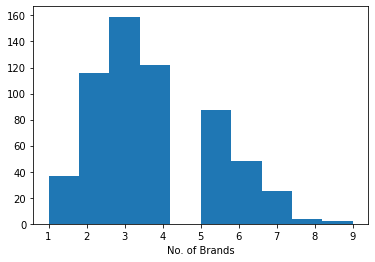

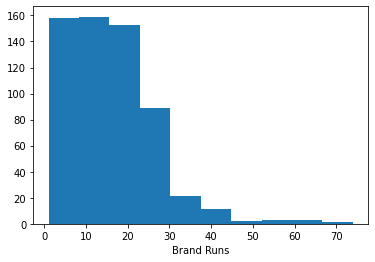

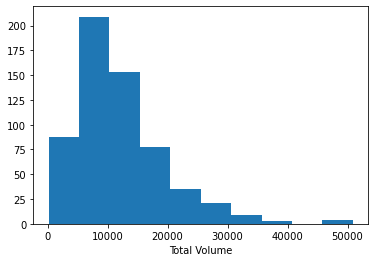

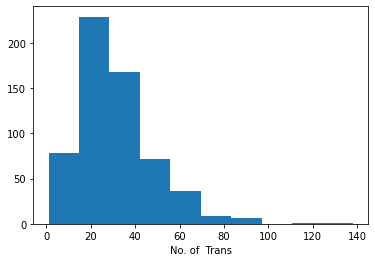

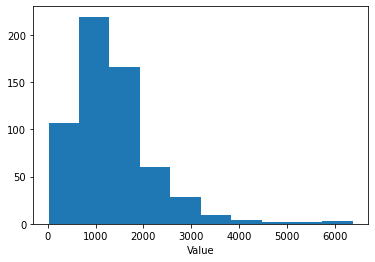

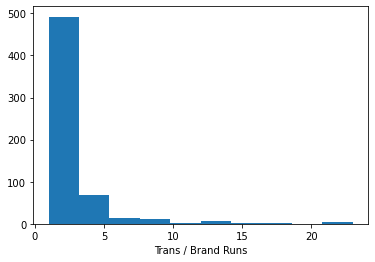

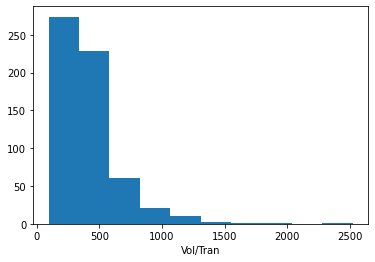

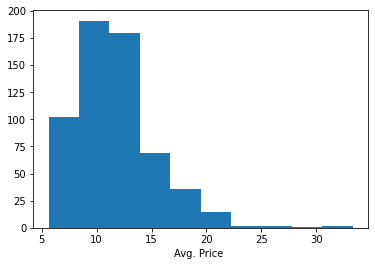

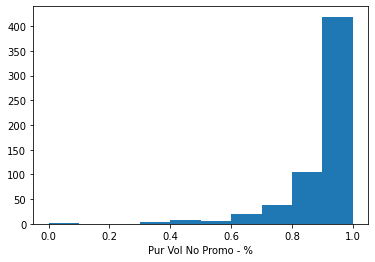

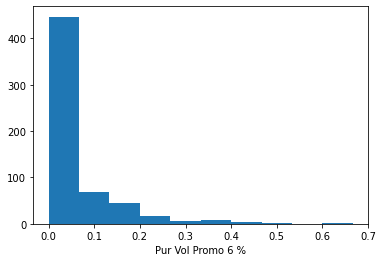

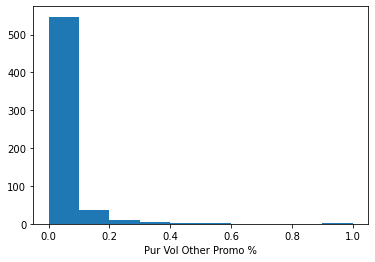

In [6]:
for var in quant_vars:
    plt.hist(all_numeric_df[var].dropna())
    plt.xlabel(var)
    plt.show()

As illustrate in the graphs, most of the people would like to purchase 2-5 brands.The number of instances of consecutive purchase of brands are mainly range between 5 to 25. The sum of value is between 1000-2000. people are not very interested in the promotion. Most of the purchase are made under no promotion. And look into the Price categorywise purchase, the maojority of the pruchase are under price category2. 

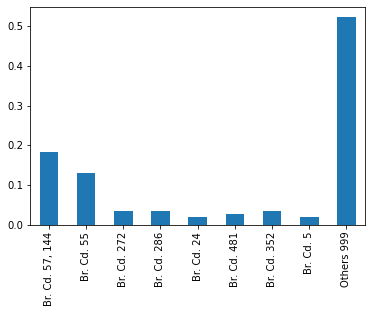

In [7]:
BathSoap_df[[ 'Br. Cd. 57, 144','Br. Cd. 55', 'Br. Cd. 272','Br. Cd. 286','Br. Cd. 24','Br. Cd. 481','Br. Cd. 352','Br. Cd. 5',
 'Others 999',]].mean().plot.bar()
plt.show()

The percent of volume purchased of the brands are very little, except the 'others999'.Since the Others999 is a combination of serveral brands, we are not counting it into analysis. Br.Cd.57,144 performs the best among the rest of the brands

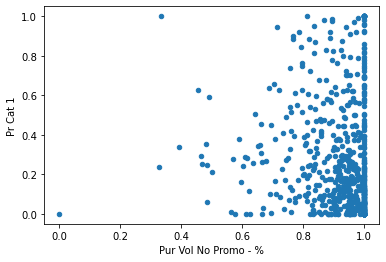

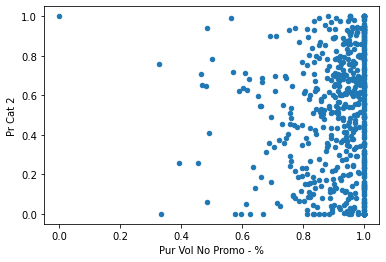

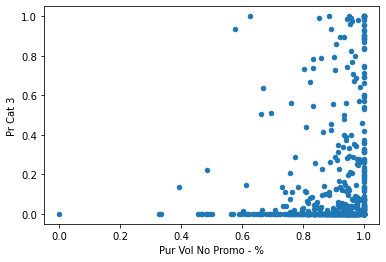

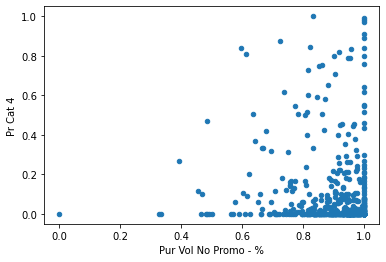

In [8]:
BathSoap_df.plot.scatter(x='Pur Vol No Promo - %', y='Pr Cat 1', legend=False)
BathSoap_df.plot.scatter(x='Pur Vol No Promo - %', y='Pr Cat 2', legend=False)
BathSoap_df.plot.scatter(x='Pur Vol No Promo - %', y='Pr Cat 3', legend=False)
BathSoap_df.plot.scatter(x='Pur Vol No Promo - %', y='Pr Cat 4', legend=False)

Since people are mainly purchase under no promotion, we would like to know would the difference price category has any impact on the result.The scater plot showed that it would not have much influence on the result.

**SEC：Socioeconomic class (1 = high, 5 =low)**

In [9]:
cat_BrandRuns = BathSoap_df.groupby("SEC")["Brand Runs"].sum().sort_values()
cat_BrandRuns

SEC
4    1967
3    2306
1    2515
2    2663
Name: Brand Runs, dtype: int64

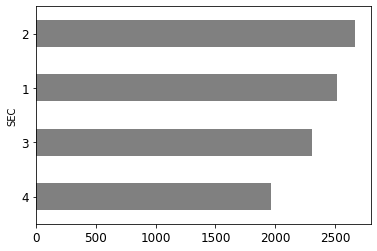

In [10]:
cat_BrandRuns.plot(kind="barh", fontsize=12, color='Grey')

People who are in SEC=1,2 are more likely to become a more consequtive purchaser of a brand.

**FEH：Eating habits(1 = vegetarian, 2 =vegetarian but eat eggs, 3 =nonvegetarian, 0 = not specified)**

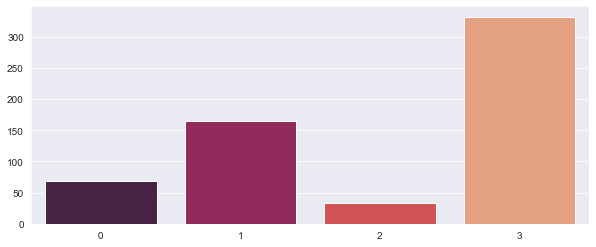

In [11]:
FEH = BathSoap_df.FEH.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=FEH.index, y=FEH.values,palette="rocket")
plt.show()

The bar chart illustrates that most households with no specified eating habits and nonvegetarian is the least. So the FEH is associated with different purchase behaviors( Including degrees of brand loyalty) and basis of purchase, we can use it to do more effective market segmentation.

In [12]:
cat_BrandRuns = BathSoap_df.groupby("FEH")["Brand Runs"].sum().sort_values()
cat_BrandRuns

FEH
0     476
2     553
1    2831
3    5591
Name: Brand Runs, dtype: int64

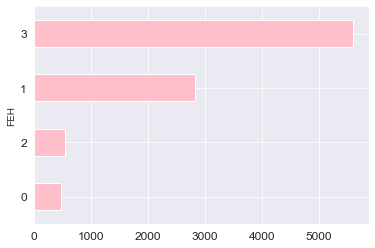

In [13]:
cat_BrandRuns.plot(kind="barh", fontsize=12, color='pink')

People who are non-vegetarian appears to be a more consequtive purchaser of a brand.

**MT:Native language**

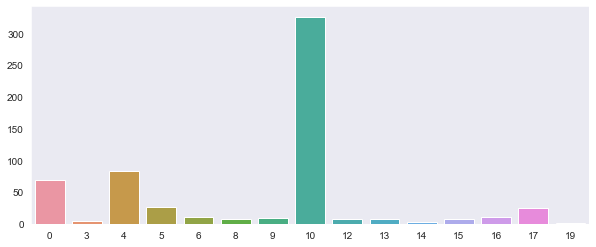

In [14]:
MT = BathSoap_df.MT.value_counts()
sns.set_style("dark")
plt.figure(figsize=(10,4))
sns.barplot(x=MT.index, y=MT.values)
plt.show()

It shows that there are 19 native languages and the number of households speaking each native language is very different. The most housed speak in the Native language =10, so we can use it to do more effective market segmentation.

In [15]:
BathSoap_df = BathSoap_df.rename(columns={'Total Volume':'TotalVolume'})

<ipython-input-16-0311b148d9e3>:4: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19], False)


Text(0, 0.5, 'Avg. Total Volume')

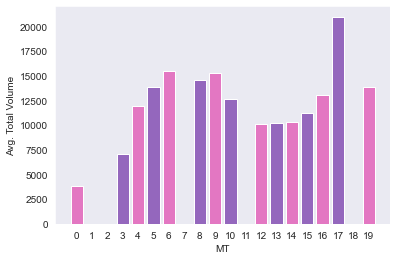

In [16]:
dataForPlot = BathSoap_df.groupby('MT').mean().TotalVolume
fig, ax = plt.subplots()
ax.bar(dataForPlot.index, dataForPlot, color=['C6', 'C4'])
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19], False)
ax.set_xlabel('MT')
ax.set_ylabel('Avg. Total Volume')

Naative language=17 has the most volume of purchase.

**SEX:Gender of homemaker (1 = male, 2 =female)**

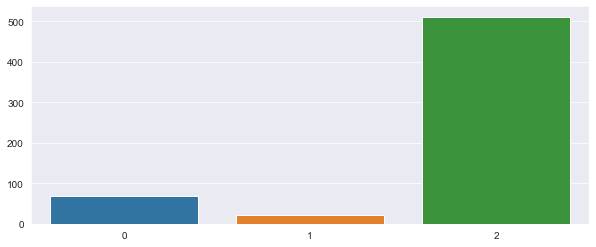

In [17]:
# bar plot to check the distribution of male and female population
SEX = BathSoap_df.SEX.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=SEX.index, y=SEX.values)
plt.show()

It shows that the female homemaker clearly outweighs the male homemaker.

**AGE:Age of homemaker**

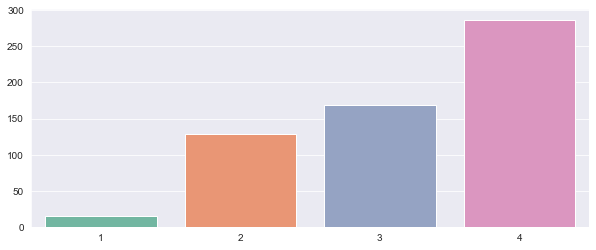

In [18]:
AGE = BathSoap_df.AGE.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=AGE.index, y=AGE.values,palette="Set2")
plt.show()

The bar chart shows an upward trend in age.

**EDU: Education of homemaker (1 =minimum, 9 = maximum)**

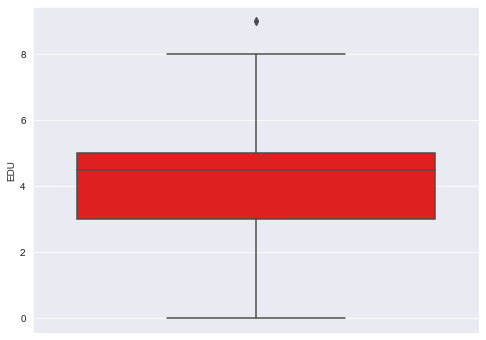

In [19]:
#made a box plot of EDU 
plt.figure(figsize=(8,6))
sns.boxplot(y=BathSoap_df["EDU"], color="red")
plt.show()

The box plot reveals the educations of 50% of homemakers are concentrated in the lower middle where EDU =[3,5].

**HS:Number of members in household**

Text(0, 0.5, 'count')

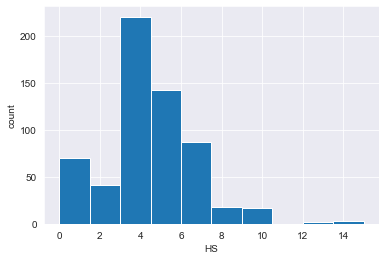

In [20]:
# histogram of HS
ax = BathSoap_df.HS.hist()
ax.set_xlabel('HS'); ax.set_ylabel('count')

We can see that most household are composed of 4-6 members.

**CHILD:Presence of children in household (5 categories)**

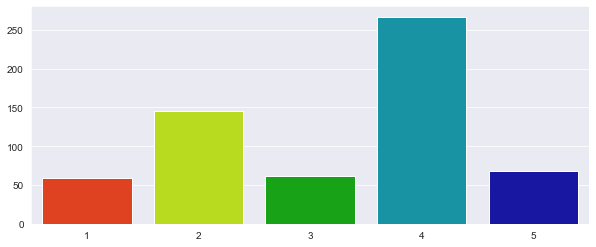

In [21]:
CHILD = BathSoap_df.CHILD.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=CHILD.index, y=CHILD.values,palette="nipy_spectral_r")
plt.show()

There are 4 children in most household.

It shows that the household with television availability is about 4 times that without. 

**Affluence Index:Weighted value of durables possessed**

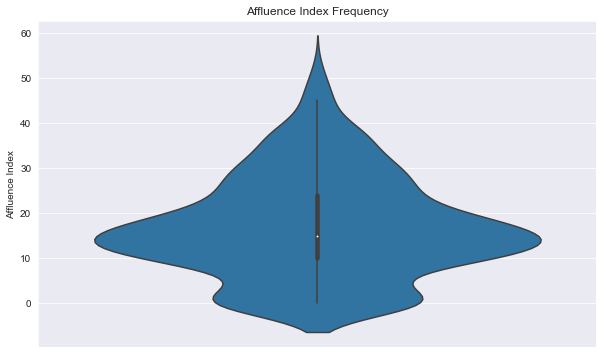

In [22]:
#plotted the Affluence Index frequency of customers.
plt.figure(figsize=(10,6))
plt.title("Affluence Index Frequency")
sns.axes_style("dark")
sns.violinplot(y=BathSoap_df["Affluence Index"])
plt.show()

The weighted value of the durable goods possessed shows the shape of a pyramid. Most households are concentrated in the part where Affluence Index = [0, 30], and only a small number of people have a high Affluence Index.
Therefore, Affluence Index is associated with different purchase behaviors( Including degrees of brand loyalty) and basis of purchase, we can use it to do more effective market segmentation.

**In conclusion, all demographic attributes are associated with different purchase behaviors( Including degrees of brand loyalty) and basis of purchase, and thus we can use all demographic attributes to deploy promotion budgets more effectively.**

## (2) Create Derived Variables and Select Variables for Clustering

In [23]:
#set row names (index) to the purchase_behavior_df column (Member id), and remove it. Convert all columns to `float`
BathSoap_df.set_index('Member id', inplace=True)

In [24]:
#Rename all column names
BathSoap_df = BathSoap_df.rename(columns={'No. of Brands':'Brands#', 
                                          'Trans / Brand Runs':'T/BR', 'Pur Vol No Promo - %':'No Promo', 
                                          'Pur Vol Promo 6 %':'Promo 6','Pur Vol Other Promo %':'Other Promo'})

**a.Create A Single Derived Variable for Brand Loyalty**

For brand loyalty indicators, we have 2 kinds of indicators.
(1) 8 variables to shows the percent of volume purchased of the major brands (i.e. is a customer a total devotee of brand A or brand B?). 
(2) a catch-all variable for percent of purchases devoted to other smaller brands.

Since CRISA is compiling this data for general marketing use, and not on behalf of one particular brand, we can say a customer who buys all brand A just as loyal as a customer who buys all brand B - they are both fully loyal customers in their behavior. But if we include all these 8 brand shares in the clustering, the analysis will treat those two customers as very different.

Therefore, we only use a single derived variable 'maxbrandpurchase' to indicate brand loyalty instead of the 8 brand share variables. The derived variable 'maxbrandpurchase' indicates the maximum share devoted to any one brand, which is the maximum value of 8 brand share variables.

In [25]:
BathSoap_df['maxbrandpurchase'] = BathSoap_df[['Br. Cd. 57, 144', 'Br. Cd. 55', 'Br. Cd. 272', 'Br. Cd. 286',
                                                                 'Br. Cd. 24', 'Br. Cd. 481', 'Br. Cd. 352', 
                                                                 'Br. Cd. 5']].max(axis=1)

In [26]:
BathSoap_df = BathSoap_df.drop(['Br. Cd. 57, 144', 'Br. Cd. 55', 'Br. Cd. 272', 'Br. Cd. 286', 
                                  'Br. Cd. 24', 'Br. Cd. 481', 'Br. Cd. 352', 'Br. Cd. 5'], axis=1)

**b. Select Basis of Purchase Variables**

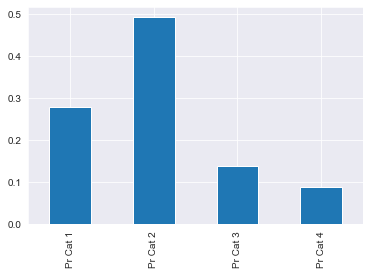

In [27]:
BathSoap_df[['Pr Cat 1','Pr Cat 2','Pr Cat 3','Pr Cat 4']].mean().plot.bar()

plt.show()

The bar chart illustrates that the average percent of volume purchased under the 4 price categories are different and every price category seemed to be responding to. Therefore, we can use all price categories to do the cluster.

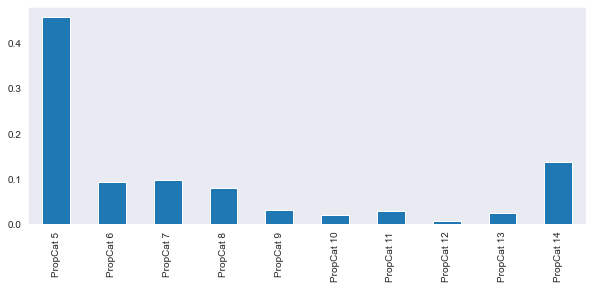

In [28]:
sns.set_style("dark")
plt.figure(figsize=(10,4))
BathSoap_df.iloc[:,26:36].mean().plot.bar()

plt.show()

We can see that the most housholds seemed to be responding to selling propositions 5 and 14, so we only select 'PropCat 5' and 'PropCat 14' to do the cluster.

In [29]:
BathSoap_df = BathSoap_df.drop(['PropCat 6', 'PropCat 7', 'PropCat 8','PropCat 9', 'PropCat 10', 
                                'PropCat 11', 'PropCat 12', 'PropCat 13', 'PropCat 15'], axis=1)

BathSoap_df

,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,Affluence Index,...,Promo 6,Other Promo,Others 999,Pr Cat 1,Pr Cat 2,Pr Cat 3,Pr Cat 4,PropCat 5,PropCat 14,maxbrandpurchase
Member id,,,,,,,,,,,,,,,,,,,,,
1010010,4,3,10,1,4,4,2,4,1,2,...,0.000000,0.000000,0.492212,0.233645,0.560748,0.130841,0.074766,0.501558,0.130841,0.376947
1010020,3,2,10,2,2,4,4,2,1,19,...,0.096601,0.016100,0.699463,0.293381,0.547406,0.094812,0.064401,0.456172,0.080501,0.144902
1014020,2,3,10,2,4,5,6,4,1,23,...,0.019481,0.038961,0.378788,0.120130,0.318182,0.561688,0.000000,0.244589,0.561688,0.545455
1014030,4,0,0,0,4,0,0,5,0,0,...,0.000000,0.000000,0.000000,0.000000,0.400000,0.600000,0.000000,0.400000,0.600000,0.600000
1014190,4,1,10,2,3,4,4,3,1,10,...,0.144578,0.240964,0.807229,0.000000,0.048193,0.144578,0.807229,0.807229,0.144578,0.144578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1167090,2,3,10,2,4,5,5,4,1,15,...,0.224377,0.000000,0.058172,0.058172,0.941828,0.000000,0.000000,0.077562,0.000000,0.897507
1167230,3,3,10,2,3,5,4,4,1,29,...,0.074257,0.000000,0.678218,0.534653,0.366337,0.000000,0.099010,0.168317,0.000000,0.103960
1167340,3,3,17,2,4,4,9,4,1,13,...,0.000000,0.000000,0.557560,0.170103,0.649485,0.180412,0.000000,0.622852,0.180412,0.246564


**In conclusion, In the data exploration step, we created a new database which includes 600 records and 29 fields. We will use this database to do the segment the market for purchase behavior of households.**

## 2. Cluster Analysis Using k-means

In [30]:
# Create a subdata with variables that only and purchase behavior and  basis of purchase
#（Brand Indicators, Behaviour Indicators, Purchase Indicators）
bathsoap_purchase_df = BathSoap_df.iloc[:,10:]

bathsoap_purchase_df

,Brands#,Brand Runs,TotalVolume,No. of Trans,Value,T/BR,Vol/Tran,Avg. Price,No Promo,Promo 6,Other Promo,Others 999,Pr Cat 1,Pr Cat 2,Pr Cat 3,Pr Cat 4,PropCat 5,PropCat 14,maxbrandpurchase
Member id,,,,,,,,,,,,,,,,,,,
1010010,3,17,8025,24,818.00,1.41,334.38,10.19,1.000000,0.000000,0.000000,0.492212,0.233645,0.560748,0.130841,0.074766,0.501558,0.130841,0.376947
1010020,5,25,13975,40,1681.50,1.60,349.38,12.03,0.887299,0.096601,0.016100,0.699463,0.293381,0.547406,0.094812,0.064401,0.456172,0.080501,0.144902
1014020,5,37,23100,63,1950.00,1.70,366.67,8.44,0.941558,0.019481,0.038961,0.378788,0.120130,0.318182,0.561688,0.000000,0.244589,0.561688,0.545455
1014030,2,4,1500,4,114.00,1.00,375.00,7.60,1.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.600000,0.000000,0.400000,0.600000,0.600000
1014190,3,6,8300,13,591.00,2.17,638.46,7.12,0.614458,0.144578,0.240964,0.807229,0.000000,0.048193,0.144578,0.807229,0.807229,0.144578,0.144578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1167090,3,5,9025,22,1218.00,4.40,410.23,13.50,0.775623,0.224377,0.000000,0.058172,0.058172,0.941828,0.000000,0.000000,0.077562,0.000000,0.897507
1167230,5,23,5050,28,851.00,1.22,180.36,16.85,0.925743,0.074257,0.000000,0.678218,0.534653,0.366337,0.000000,0.099010,0.168317,0.000000,0.103960
1167340,4,19,29100,25,3302.75,1.32,1164.00,11.35,1.000000,0.000000,0.000000,0.557560,0.170103,0.649485,0.180412,0.000000,0.622852,0.180412,0.246564


**In conclusion, we created a final database without demographic indicators, which includes 600 records and 19 fields. We will use this database to do the segment the market for brand loyalty and basis of purchaseof of households.**

## (1) Scenario 1：Segment the Households into 2 Clusters(k=2)

In [31]:
# while not required, the conversion of integer data to float will avoid a warning when 
# applying the scale function
bathsoap_purchase_df =bathsoap_purchase_df.apply(lambda x: x.astype('float64'))

bathsoap_purchase_df

,Brands#,Brand Runs,TotalVolume,No. of Trans,Value,T/BR,Vol/Tran,Avg. Price,No Promo,Promo 6,Other Promo,Others 999,Pr Cat 1,Pr Cat 2,Pr Cat 3,Pr Cat 4,PropCat 5,PropCat 14,maxbrandpurchase
Member id,,,,,,,,,,,,,,,,,,,
1010010,3.0,17.0,8025.0,24.0,818.00,1.41,334.38,10.19,1.000000,0.000000,0.000000,0.492212,0.233645,0.560748,0.130841,0.074766,0.501558,0.130841,0.376947
1010020,5.0,25.0,13975.0,40.0,1681.50,1.60,349.38,12.03,0.887299,0.096601,0.016100,0.699463,0.293381,0.547406,0.094812,0.064401,0.456172,0.080501,0.144902
1014020,5.0,37.0,23100.0,63.0,1950.00,1.70,366.67,8.44,0.941558,0.019481,0.038961,0.378788,0.120130,0.318182,0.561688,0.000000,0.244589,0.561688,0.545455
1014030,2.0,4.0,1500.0,4.0,114.00,1.00,375.00,7.60,1.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.600000,0.000000,0.400000,0.600000,0.600000
1014190,3.0,6.0,8300.0,13.0,591.00,2.17,638.46,7.12,0.614458,0.144578,0.240964,0.807229,0.000000,0.048193,0.144578,0.807229,0.807229,0.144578,0.144578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1167090,3.0,5.0,9025.0,22.0,1218.00,4.40,410.23,13.50,0.775623,0.224377,0.000000,0.058172,0.058172,0.941828,0.000000,0.000000,0.077562,0.000000,0.897507
1167230,5.0,23.0,5050.0,28.0,851.00,1.22,180.36,16.85,0.925743,0.074257,0.000000,0.678218,0.534653,0.366337,0.000000,0.099010,0.168317,0.000000,0.103960
1167340,4.0,19.0,29100.0,25.0,3302.75,1.32,1164.00,11.35,1.000000,0.000000,0.000000,0.557560,0.170103,0.649485,0.180412,0.000000,0.622852,0.180412,0.246564


**a. Normalize the Data**

In [32]:
# Normalized distance
bathsoap_purchase_norm = bathsoap_purchase_df.apply(preprocessing.scale, axis=0)

**b. Cluster Analysis Using k-means:k=2**

In [33]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(bathsoap_purchase_norm)

In [34]:
# Cluster membership
memb = pd.Series(kmeans.labels_, index=bathsoap_purchase_norm.index)
for key, item in memb.groupby(memb):
    print(item)

Member id
1010010    0
1010020    0
1014020    0
1014190    0
1017020    0
          ..
1167090    0
1167230    0
1167340    0
1167350    0
1167670    0
Length: 528, dtype: int32
Member id
1014030    1
1017160    1
1025140    1
1025210    1
1027040    1
          ..
1125840    1
1156220    1
1157860    1
1158080    1
1163830    1
Length: 72, dtype: int32


**c. Find Variables Affecting the Cluster More**

In [35]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=bathsoap_purchase_norm.columns)
pd.set_option('precision', 3)

,Brands#,Brand Runs,TotalVolume,No. of Trans,Value,T/BR,Vol/Tran,Avg. Price,No Promo,Promo 6,Other Promo,Others 999,Pr Cat 1,Pr Cat 2,Pr Cat 3,Pr Cat 4,PropCat 5,PropCat 14,maxbrandpurchase,cluster
0,0.077,0.108,-0.018,0.058,0.070,-0.144,-0.075,0.178,-0.026,0.056,-0.029,0.172,0.109,0.160,-0.333,0.045,0.155,-0.334,-0.194,Cluster 0
1,-0.562,-0.790,0.130,-0.424,-0.517,1.054,0.550,-1.308,0.192,-0.414,0.216,-1.259,-0.803,-1.176,2.443,-0.329,-1.138,2.446,1.422,Cluster 1


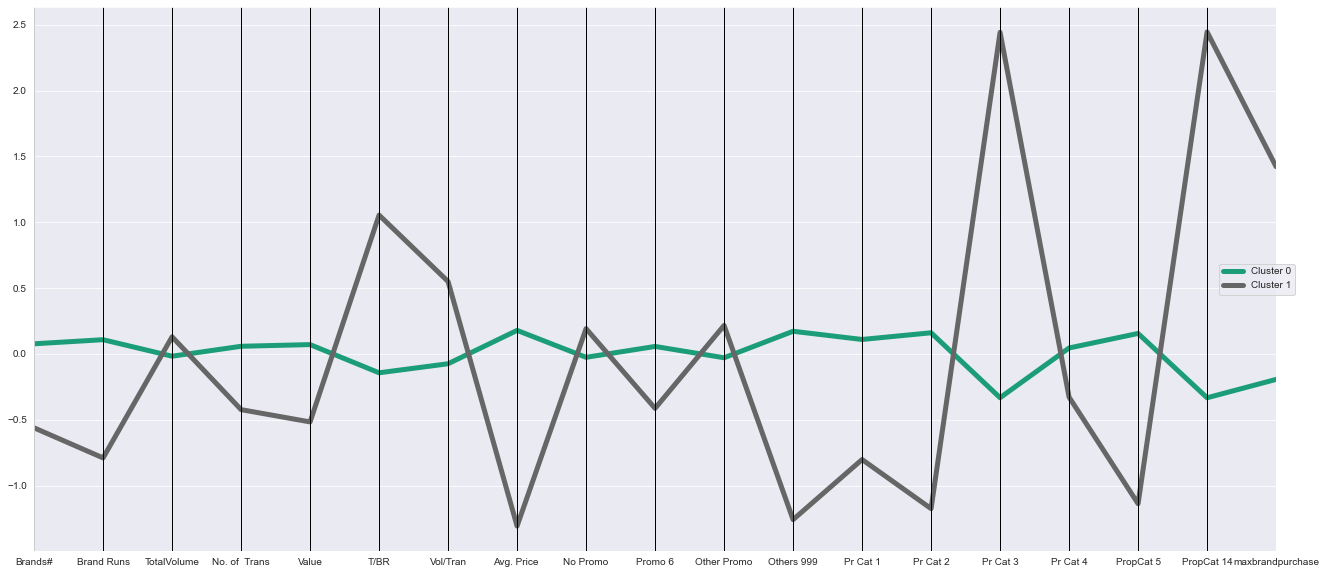

In [36]:
centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]

fig = plt.figure(figsize=(6,10))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(centroids, class_column='cluster', colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
centroids

The 2 clusters are well-separated on everything. 

**d. Validating Clusters**

**Within-cluster sum of squared distances and cluster count**

In [37]:
# calculate the distances of each data point to the cluster centers
distances = kmeans.transform(bathsoap_purchase_norm)

# find closest cluster for each data point
minSquaredDistances = distances.min(axis=1) ** 2

# combine with cluster labels into a data frame
df = pd.DataFrame({'squaredDistance': minSquaredDistances, 'cluster': kmeans.labels_}, index=bathsoap_purchase_norm.index)

# group by cluster and print information
for cluster, data in df.groupby('cluster'):
    count = len(data)
    withinClustSS = data.squaredDistance.sum()
    print('Cluster {:d}({} members):{:0.2f} within cluster'.format(cluster, count, withinClustSS))

Cluster 0(528 members):8543.26 within cluster
Cluster 1(72 members):911.68 within cluster


We inspect the information on the within-cluster dispersion. It shows that the within-cluster sum of squared distances of clusters #0 (with 528 records) is large than clusters #1 (with 72 records), and  clusters #0 are thus the more heterogeneous. 

**Euclidean Distance between Cluster centroids**

In [38]:
pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_,metric='euclidean'))

,0,1
0,0.000,5.541
1,5.541,0.000


We can see that Euclidean Distance between Cluster centroids between clusters #0 and #1 is 5.541.

**e.Summary the Characteristics of Clusters**

In [39]:
#Create a new database with the binary varibale
bathsoap_purchase_new = pd.concat([memb, BathSoap_df], axis=1)

In [40]:
bathsoap_purchase_new = bathsoap_purchase_new.rename(columns={0: 'Cluster'})

In [41]:
bathsoap_purchase_new

,Cluster,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,...,Promo 6,Other Promo,Others 999,Pr Cat 1,Pr Cat 2,Pr Cat 3,Pr Cat 4,PropCat 5,PropCat 14,maxbrandpurchase
Member id,,,,,,,,,,,,,,,,,,,,,
1010010,0,4,3,10,1,4,4,2,4,1,...,0.000,0.000,0.492,0.234,0.561,0.131,0.075,0.502,0.131,0.377
1010020,0,3,2,10,2,2,4,4,2,1,...,0.097,0.016,0.699,0.293,0.547,0.095,0.064,0.456,0.081,0.145
1014020,0,2,3,10,2,4,5,6,4,1,...,0.019,0.039,0.379,0.120,0.318,0.562,0.000,0.245,0.562,0.545
1014030,1,4,0,0,0,4,0,0,5,0,...,0.000,0.000,0.000,0.000,0.400,0.600,0.000,0.400,0.600,0.600
1014190,0,4,1,10,2,3,4,4,3,1,...,0.145,0.241,0.807,0.000,0.048,0.145,0.807,0.807,0.145,0.145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1167090,0,2,3,10,2,4,5,5,4,1,...,0.224,0.000,0.058,0.058,0.942,0.000,0.000,0.078,0.000,0.898
1167230,0,3,3,10,2,3,5,4,4,1,...,0.074,0.000,0.678,0.535,0.366,0.000,0.099,0.168,0.000,0.104
1167340,0,3,3,17,2,4,4,9,4,1,...,0.000,0.000,0.558,0.170,0.649,0.180,0.000,0.623,0.180,0.247


In [42]:
demographic_df = bathsoap_purchase_new.iloc[:,:11]

In [43]:
#demographic_df.groupby(['Cluster']).count()

In [44]:
demographic_df.groupby(['Cluster']).mean()

,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,Affluence Index
Cluster,,,,,,,,,,
0,2.375,2.049,8.250,1.763,3.246,4.269,4.199,3.203,0.938,18.159
1,3.417,2.042,7.653,1.556,2.972,2.389,4.139,3.458,0.889,8.667


<h3> Comment: 

**The two clusters are separated on almost all variables, Value being an important exception.**

**Loyal Price Conscious: Cluster 0 (n=528) is high activity & value, with low loyalty and high susceptibility to discounts, and they like pricing categories 1 and 2 and are somewhat responsive to selling propositions 5. Demographically, they have high socioeconomic status and affluence, and larger households but with less children.**

**Loyal Brand Conscious: Cluster 1 (n=72) is highly loyal with favoring main brands, be averse to promotions, and responds to pricing category 3 selling propositions 14. Demographically,they with low socioeconomic status and affluence, and smaller households but with more children.**

## scenario 2：Segement the Household into 3 Clusters(k=3)

**a. Cluster Analysis Using k-means:k=3**

In [45]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(bathsoap_purchase_norm)

In [46]:
# Cluster membership
memb1 = pd.Series(kmeans.labels_, index=bathsoap_purchase_norm.index)
for key, item in memb1.groupby(memb1):
    print(item)

Member id
1010010    0
1014190    0
1017110    0
1017360    0
1020210    0
          ..
1166960    0
1166980    0
1167090    0
1167340    0
1167670    0
Length: 248, dtype: int32
Member id
1010020    1
1014020    1
1017020    1
1017460    1
1017490    1
          ..
1166340    1
1166460    1
1166740    1
1167230    1
1167350    1
Length: 280, dtype: int32
Member id
1014030    2
1017160    2
1025140    2
1025210    2
1027040    2
          ..
1125840    2
1156220    2
1157860    2
1158080    2
1163830    2
Length: 72, dtype: int32


**b. Find Variables Affecting the Cluster More**

In [47]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=bathsoap_purchase_norm.columns)
pd.set_option('precision', 3)

,Brands#,Brand Runs,TotalVolume,No. of Trans,Value,T/BR,Vol/Tran,Avg. Price,No Promo,Promo 6,Other Promo,Others 999,Pr Cat 1,Pr Cat 2,Pr Cat 3,Pr Cat 4,PropCat 5,PropCat 14,maxbrandpurchase,cluster
0,-0.347,-0.475,0.043,-0.413,-0.043,-0.019,0.374,-0.197,0.283,-0.300,-0.084,-0.226,-0.452,0.551,-0.294,0.178,0.560,-0.295,0.288,Cluster 0
1,0.438,0.617,-0.074,0.466,0.170,-0.242,-0.465,0.512,-0.302,0.372,0.021,0.522,0.606,-0.178,-0.376,-0.074,-0.206,-0.376,-0.615,Cluster 1
2,-0.509,-0.762,0.137,-0.391,-0.514,1.006,0.521,-1.311,0.197,-0.414,0.208,-1.249,-0.798,-1.206,2.472,-0.328,-1.128,2.476,1.398,Cluster 2


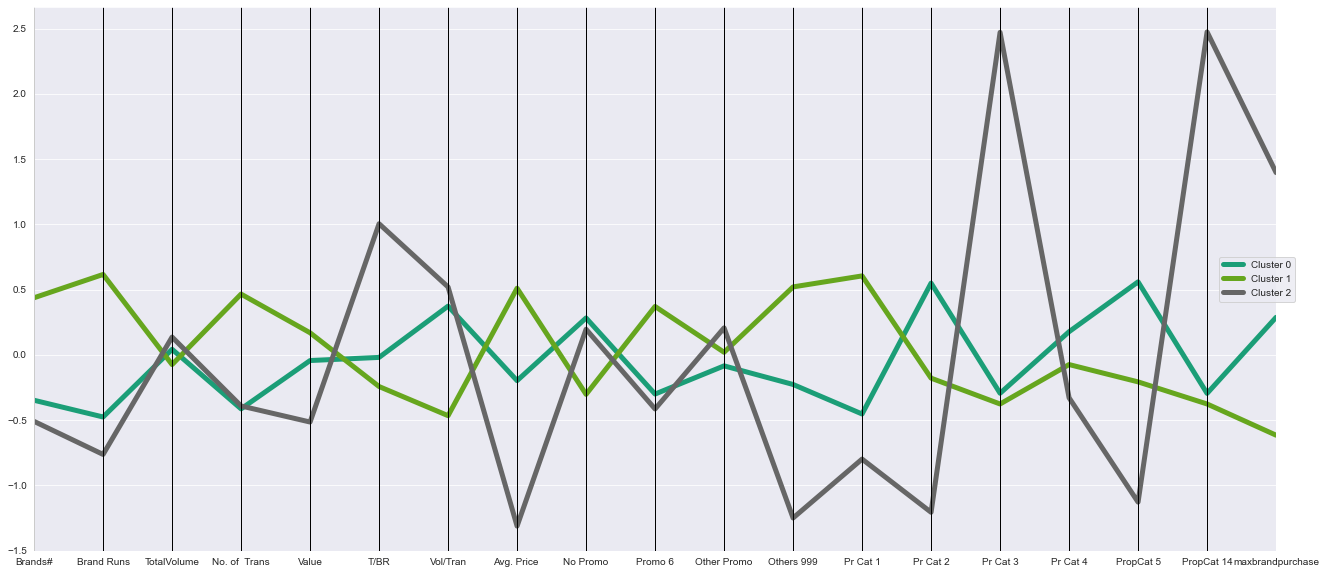

In [48]:
centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]

fig = plt.figure(figsize=(6,10))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(centroids, class_column='cluster', colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
centroids

The 3 clusters are well-separated . 

**c. Validating Clusters**

**Within-cluster sum of squared distances and cluster count**

In [49]:
# calculate the distances of each data point to the cluster centers
distances = kmeans.transform(bathsoap_purchase_norm)

# find closest cluster for each data point
minSquaredDistances = distances.min(axis=1) ** 2

# combine with cluster labels into a data frame
df = pd.DataFrame({'squaredDistance': minSquaredDistances, 'cluster': kmeans.labels_}, index=bathsoap_purchase_norm.index)

# group by cluster and print information
for cluster, data in df.groupby('cluster'):
    count = len(data)
    withinClustSS = data.squaredDistance.sum()
    print('Cluster {:d}({} members):{:0.2f} within cluster'.format(cluster, count, withinClustSS))

Cluster 0(248 members):3636.90 within cluster
Cluster 1(280 members):3814.19 within cluster
Cluster 2(72 members):901.25 within cluster


We inspect the information on the within-cluster dispersion. It shows that clusters #1 has the largest within-cluster sum of squared distances and are thus the most heterogeneous. In contrast, cluster #2, with 72 records, has a smaller within-cluster sum of squared distances (although it also has fewer records). 

**Euclidean Distance between Cluster centroids**

In [50]:
pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_,metric='euclidean'))

,0,1,2
0,0.000,2.897,5.165
1,2.897,0.000,6.178
2,5.165,6.178,0.000


From the distances between clusters measured by Euclidean distance between the centroids, we can learn about the separation of the different clusters. For instance, we can see that clusters #0 and #1 are the closest to one another, and clusters #1 and #2 are the most distant from one another. Cluster #2 is most distant from the other clusters, overall, but there is no cluster that is a striking outlier.

**d.Summary the Characteristics of Clusters**

In [51]:
#Create a new database with the binary varibale
bathsoap_purchase_new1 = pd.concat([memb1, BathSoap_df], axis=1)

In [52]:
bathsoap_purchase_new1 = bathsoap_purchase_new1.rename(columns={0: 'Cluster'})

In [53]:
bathsoap_purchase_new1

,Cluster,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,...,Promo 6,Other Promo,Others 999,Pr Cat 1,Pr Cat 2,Pr Cat 3,Pr Cat 4,PropCat 5,PropCat 14,maxbrandpurchase
Member id,,,,,,,,,,,,,,,,,,,,,
1010010,0,4,3,10,1,4,4,2,4,1,...,0.000,0.000,0.492,0.234,0.561,0.131,0.075,0.502,0.131,0.377
1010020,1,3,2,10,2,2,4,4,2,1,...,0.097,0.016,0.699,0.293,0.547,0.095,0.064,0.456,0.081,0.145
1014020,1,2,3,10,2,4,5,6,4,1,...,0.019,0.039,0.379,0.120,0.318,0.562,0.000,0.245,0.562,0.545
1014030,2,4,0,0,0,4,0,0,5,0,...,0.000,0.000,0.000,0.000,0.400,0.600,0.000,0.400,0.600,0.600
1014190,0,4,1,10,2,3,4,4,3,1,...,0.145,0.241,0.807,0.000,0.048,0.145,0.807,0.807,0.145,0.145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1167090,0,2,3,10,2,4,5,5,4,1,...,0.224,0.000,0.058,0.058,0.942,0.000,0.000,0.078,0.000,0.898
1167230,1,3,3,10,2,3,5,4,4,1,...,0.074,0.000,0.678,0.535,0.366,0.000,0.099,0.168,0.000,0.104
1167340,0,3,3,17,2,4,4,9,4,1,...,0.000,0.000,0.558,0.170,0.649,0.180,0.000,0.623,0.180,0.247


In [54]:
demographic_df1 = bathsoap_purchase_new1.iloc[:,:11]

In [55]:
#demographic_df1.groupby(['Cluster']).count()

In [56]:
demographic_df1.groupby(['Cluster']).mean()

,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,Affluence Index
Cluster,,,,,,,,,,
0,2.641,2.008,7.980,1.694,3.230,3.802,4.194,3.262,0.899,14.895
1,2.139,2.086,8.489,1.825,3.254,4.693,4.207,3.143,0.971,21.043
2,3.417,2.042,7.653,1.556,3.000,2.347,4.125,3.486,0.889,8.694


<h3> Comment: 

**In conclusion, we segment the households into 3 clusters and they are well-separated on most variables.**

**Loyal Brand Conscious: Cluster 2(n=72) has high brand loyalty with favoring main brands and low value. Highly responsive to price category 3 and selling proposition 14. Demographically, it has low affluence and education with a high number of children in the household.**

**High Purchasing Power: Cluster 1 (n=280) is not at all loyal but of high value. It is responsive to pricing category 1. Demographically, it has the highest affluent and socioeconomic class with the highest education.**

**Ordinary Brand Conscious: Cluster 0 (n=248) is not very loyal with favoring many brands and responsive to price category 2 and selling proposition 5. Demographically, it is relatively affluent and with lower socioeconomic class. It also has a relatively higher number of members in the household.**

## scenario 3：Segement the Household into 4 Clusters(k=4)

**a. Cluster Analysis Using k-means:k=4**

In [57]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(bathsoap_purchase_norm)

In [58]:
# Cluster membership
memb2 = pd.Series(kmeans.labels_, index=bathsoap_purchase_norm.index)
for key, item in memb2.groupby(memb2):
    print(item)

Member id
1010010    0
1014190    0
1017110    0
1017360    0
1020210    0
          ..
1166960    0
1166980    0
1167090    0
1167340    0
1167670    0
Length: 220, dtype: int32
Member id
1017460    1
1025070    1
1045030    1
1047610    1
1047980    1
          ..
1165070    1
1165090    1
1165310    1
1166740    1
1167230    1
Length: 108, dtype: int32
Member id
1014030    2
1017160    2
1025140    2
1025210    2
1027040    2
          ..
1125840    2
1156220    2
1157860    2
1158080    2
1163830    2
Length: 70, dtype: int32
Member id
1010020    3
1014020    3
1017020    3
1017490    3
1020070    3
          ..
1165720    3
1166020    3
1166080    3
1166460    3
1167350    3
Length: 202, dtype: int32


**b. Find Variables Affecting the Cluster More**

In [59]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=bathsoap_purchase_norm.columns)
pd.set_option('precision', 3)

,Brands#,Brand Runs,TotalVolume,No. of Trans,Value,T/BR,Vol/Tran,Avg. Price,No Promo,Promo 6,Other Promo,Others 999,Pr Cat 1,Pr Cat 2,Pr Cat 3,Pr Cat 4,PropCat 5,PropCat 14,maxbrandpurchase,cluster
0,-0.375,-0.476,0.022,-0.407,-0.073,0.011,0.388,-0.303,0.277,-0.307,-0.063,-0.196,-0.596,0.673,-0.314,0.219,0.613,-0.315,0.268,Cluster 0
1,-0.415,-0.324,-0.653,-0.428,-0.218,-0.137,-0.458,1.364,0.193,-0.186,-0.081,0.523,1.652,-0.827,-0.479,-0.406,-0.372,-0.473,-0.429,Cluster 1
2,-0.584,-0.801,0.083,-0.434,-0.556,1.038,0.514,-1.319,0.210,-0.436,0.214,-1.265,-0.798,-1.222,2.498,-0.337,-1.144,2.500,1.422,Cluster 2
3,0.832,0.969,0.296,0.823,0.389,-0.298,-0.356,0.057,-0.478,0.586,0.037,0.372,0.042,0.133,-0.267,0.096,-0.072,-0.271,-0.555,Cluster 3


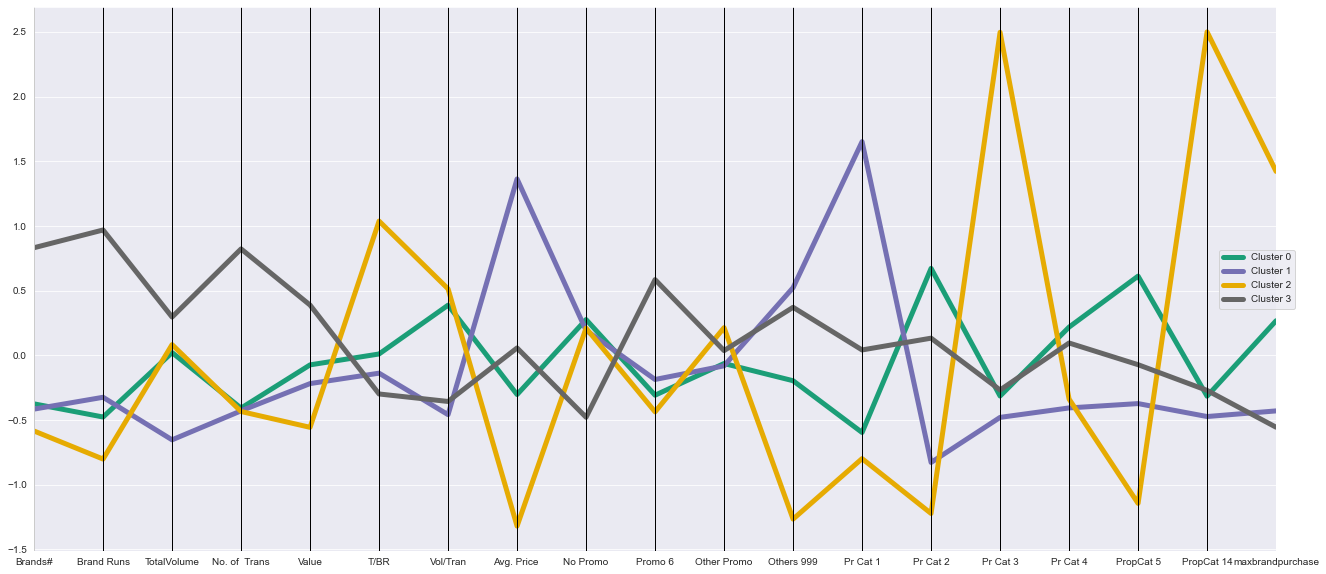

In [60]:
centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]

fig = plt.figure(figsize=(6,10))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(centroids, class_column='cluster', colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
centroids

The 4 clusters are well-separated . 

**c. Validating Clusters**

**Within-cluster sum of squared distances and cluster count**

In [61]:
# calculate the distances of each data point to the cluster centers
distances = kmeans.transform(bathsoap_purchase_norm)

# find closest cluster for each data point
minSquaredDistances = distances.min(axis=1) ** 2

# combine with cluster labels into a data frame
df = pd.DataFrame({'squaredDistance': minSquaredDistances, 'cluster': kmeans.labels_}, index=bathsoap_purchase_norm.index)

# group by cluster and print information
for cluster, data in df.groupby('cluster'):
    count = len(data)
    withinClustSS = data.squaredDistance.sum()
    print('Cluster {:d}({} members):{:0.2f} within cluster'.format(cluster, count, withinClustSS))

Cluster 0(220 members):2990.06 within cluster
Cluster 1(108 members):1109.70 within cluster
Cluster 2(70 members):846.42 within cluster
Cluster 3(202 members):2552.64 within cluster


We inspect the information on the within-cluster dispersion. It shows that clusters #0 has the largest within-cluster sum of squared distances and are thus the most heterogeneous. In contrast, cluster #2, with 70 records, has a smaller within-cluster sum of squared distances (although it also has fewer records). 

**Euclidean Distance between Cluster centroids**

In [62]:
pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_,metric='euclidean'))

,0,1,2,3
0,0.000,3.709,5.284,3.113
1,3.709,0.000,6.456,3.585
2,5.284,6.456,0.000,6.280
3,3.113,3.585,6.280,0.000


From the distances between clusters measured by Euclidean distance between the centroids, we can learn about the separation of the different clusters. For instance, we can see that clusters #0 and #3 are the closest to one another, and clusters #1 and #2 are the most distant from one another. Cluster #2 is most distant from the other clusters, overall, but there is no cluster that is a striking outlier.

**d.Summary the Characteristics of Clusters**

In [63]:
#Create a new database with the binary varibale
bathsoap_purchase_new2 = pd.concat([memb2, BathSoap_df], axis=1)

In [64]:
bathsoap_purchase_new2 = bathsoap_purchase_new2.rename(columns={0: 'Cluster'})

In [65]:
bathsoap_purchase_new2

,Cluster,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,...,Promo 6,Other Promo,Others 999,Pr Cat 1,Pr Cat 2,Pr Cat 3,Pr Cat 4,PropCat 5,PropCat 14,maxbrandpurchase
Member id,,,,,,,,,,,,,,,,,,,,,
1010010,0,4,3,10,1,4,4,2,4,1,...,0.000,0.000,0.492,0.234,0.561,0.131,0.075,0.502,0.131,0.377
1010020,3,3,2,10,2,2,4,4,2,1,...,0.097,0.016,0.699,0.293,0.547,0.095,0.064,0.456,0.081,0.145
1014020,3,2,3,10,2,4,5,6,4,1,...,0.019,0.039,0.379,0.120,0.318,0.562,0.000,0.245,0.562,0.545
1014030,2,4,0,0,0,4,0,0,5,0,...,0.000,0.000,0.000,0.000,0.400,0.600,0.000,0.400,0.600,0.600
1014190,0,4,1,10,2,3,4,4,3,1,...,0.145,0.241,0.807,0.000,0.048,0.145,0.807,0.807,0.145,0.145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1167090,0,2,3,10,2,4,5,5,4,1,...,0.224,0.000,0.058,0.058,0.942,0.000,0.000,0.078,0.000,0.898
1167230,1,3,3,10,2,3,5,4,4,1,...,0.074,0.000,0.678,0.535,0.366,0.000,0.099,0.168,0.000,0.104
1167340,0,3,3,17,2,4,4,9,4,1,...,0.000,0.000,0.558,0.170,0.649,0.180,0.000,0.623,0.180,0.247


In [66]:
demographic_df2 = bathsoap_purchase_new2.iloc[:,:11]

In [67]:
#demographic_df2.groupby(['Cluster']).count()

In [68]:
demographic_df2.groupby(['Cluster']).mean()

,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,Affluence Index
Cluster,,,,,,,,,,
0,2.677,2.068,8.282,1.764,3.200,3.991,4.377,3.168,0.941,15.727
1,1.787,1.657,6.704,1.472,3.157,4.157,3.037,3.546,0.741,17.944
2,3.400,2.043,7.671,1.543,3.014,2.357,3.914,3.514,0.871,8.543
3,2.376,2.238,9.030,1.921,3.327,4.624,4.703,3.040,1.045,20.871


<h3> Comment: 

**Loyal Brand Conscious: Cluster 2 (n=70) stands out in both groups of variables - it has high loyalty, low value and price per purchase, and very differential response to price (unresponsive to categories 1, 2, and 4, highly responsive to category 3), and selling proposition (unresponsive to #5, highly responsive to #14). Demographically, it is low affluent and low education.**

**High Purchasing Power: Cluster 3 (n=202) is distinguished mostly by the purchase behavior variables - it has low brand loyalty together with high value, volume, and frequency. The brand switching seems to be intrinsic - this group is not particularly responsive to promotions (only responsive to promotion code 6), pricing, or selling propositions. Demographically it is relatively affluent and educated.**

**Random Purchaser: Cluster 0 (n=220) is a "gray" cluster, it is not characterized by very extreme values across all variables but is responsive to price category 2 and selling proposition 5. Demographically, it is relatively affluent and educated.**

**Low Purchasing Power: Cluster 1 (n=108) is characterized by low volume, low loyalty, and sensitivity to price (responsive to cat. 1, unresponsive to 2, 3, and 4), and unmoved by selling proposition. Demographically, it is affluent, of high socioeconomic status, and has a relatively small family size.**

## 3. Logistical Regression

In [70]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from mord import LogisticIT
import matplotlib.pylab as plt
import seaborn as sns
from dmba import classificationSummary, gainsChart,  liftChart
from dmba.metric import AIC_score

In [71]:
bathsoap_purchase_new['Conscious'] = np.where(bathsoap_purchase_new['Cluster']!= 0, 0, 1)

In [72]:
Conscious_df = bathsoap_purchase_new.drop(['Cluster'], axis=1)

We decide to use senario 1's cluster to determine the clients are consious oe not. In this case, Consious=1 means the cient is consious, conscious=0 means the client is not conscious

In [73]:
#transfer the cluster into binary variable Conscious
Conscious_df

,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,Affluence Index,...,Other Promo,Others 999,Pr Cat 1,Pr Cat 2,Pr Cat 3,Pr Cat 4,PropCat 5,PropCat 14,maxbrandpurchase,Conscious
Member id,,,,,,,,,,,,,,,,,,,,,
1010010,4,3,10,1,4,4,2,4,1,2,...,0.000,0.492,0.234,0.561,0.131,0.075,0.502,0.131,0.377,1
1010020,3,2,10,2,2,4,4,2,1,19,...,0.016,0.699,0.293,0.547,0.095,0.064,0.456,0.081,0.145,1
1014020,2,3,10,2,4,5,6,4,1,23,...,0.039,0.379,0.120,0.318,0.562,0.000,0.245,0.562,0.545,1
1014030,4,0,0,0,4,0,0,5,0,0,...,0.000,0.000,0.000,0.400,0.600,0.000,0.400,0.600,0.600,0
1014190,4,1,10,2,3,4,4,3,1,10,...,0.241,0.807,0.000,0.048,0.145,0.807,0.807,0.145,0.145,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1167090,2,3,10,2,4,5,5,4,1,15,...,0.000,0.058,0.058,0.942,0.000,0.000,0.078,0.000,0.898,1
1167230,3,3,10,2,3,5,4,4,1,29,...,0.000,0.678,0.535,0.366,0.000,0.099,0.168,0.000,0.104,1
1167340,3,3,17,2,4,4,9,4,1,13,...,0.000,0.558,0.170,0.649,0.180,0.000,0.623,0.180,0.247,1


In [74]:
y = Conscious_df['Conscious']
X = Conscious_df.drop(columns=['Conscious'])

In [75]:
# partition data
train_X, valid_X, train_y, valid_y = train_test_split(X, y, 
   test_size=0.4, random_state=1)

In [76]:
# fit a logistic regression (set penalty=l2 and C=1e42 to avoid regularization)
logit_reg = LogisticRegression(penalty="l2", C=1e42, 
   solver='liblinear')
logit_reg.fit(train_X, train_y)

LogisticRegression(C=1e+42, solver='liblinear')

In [77]:
logit_reg.intercept_[0]

-0.07159967805655298

In [78]:
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, 
   index=X.columns).transpose())
print('AIC', AIC_score(valid_y, logit_reg.predict(valid_X), df = 
   len(train_X.columns) + 1))

intercept  -0.07159967805655298
        SEC    FEH     MT    SEX    AGE    EDU     HS  CHILD     CS  \
coeff -0.54 -0.171  0.095 -0.062 -0.133 -0.325 -0.116 -0.197  0.435   

       Affluence Index  ...  Promo 6  Other Promo  Others 999  Pr Cat 1  \
coeff           -0.007  ...    0.094       -0.024       1.284    -0.204   

       Pr Cat 2  Pr Cat 3  Pr Cat 4  PropCat 5  PropCat 14  maxbrandpurchase  
coeff      0.62    -1.652     1.165      1.682      -1.676            -1.096  

[1 rows x 29 columns]
AIC -239.5521989950613


In [79]:
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, 
   index=X.columns))

intercept  -0.07159967805655298
                      coeff
SEC              -5.404e-01
FEH              -1.711e-01
MT                9.484e-02
SEX              -6.207e-02
AGE              -1.327e-01
EDU              -3.248e-01
HS               -1.164e-01
CHILD            -1.970e-01
CS                4.354e-01
Affluence Index  -7.344e-03
Brands#          -3.577e-01
Brand Runs        1.779e-01
TotalVolume      -3.886e-04
No. of  Trans    -5.733e-02
Value             6.122e-03
T/BR              1.536e-01
Vol/Tran         -1.171e-03
Avg. Price        4.998e-01
No Promo         -1.417e-01
Promo 6           9.370e-02
Other Promo      -2.364e-02
Others 999        1.284e+00
Pr Cat 1         -2.043e-01
Pr Cat 2          6.196e-01
Pr Cat 3         -1.652e+00
Pr Cat 4          1.165e+00
PropCat 5         1.682e+00
PropCat 14       -1.676e+00
maxbrandpurchase -1.096e+00


In [80]:
print(pd.DataFrame({'Odds': np.exp(logit_reg.coef_[0])}, index=X.columns))

                   Odds
SEC               0.583
FEH               0.843
MT                1.099
SEX               0.940
AGE               0.876
EDU               0.723
HS                0.890
CHILD             0.821
CS                1.546
Affluence Index   0.993
Brands#           0.699
Brand Runs        1.195
TotalVolume       1.000
No. of  Trans     0.944
Value             1.006
T/BR              1.166
Vol/Tran          0.999
Avg. Price        1.648
No Promo          0.868
Promo 6           1.098
Other Promo       0.977
Others 999        3.612
Pr Cat 1          0.815
Pr Cat 2          1.858
Pr Cat 3          0.192
Pr Cat 4          3.206
PropCat 5         5.374
PropCat 14        0.187
maxbrandpurchase  0.334


In [81]:
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0], 'Odds': np.exp(logit_reg.coef_[0])}, index=X.columns))

intercept  -0.07159967805655298
                      coeff   Odds
SEC              -5.404e-01  0.583
FEH              -1.711e-01  0.843
MT                9.484e-02  1.099
SEX              -6.207e-02  0.940
AGE              -1.327e-01  0.876
EDU              -3.248e-01  0.723
HS               -1.164e-01  0.890
CHILD            -1.970e-01  0.821
CS                4.354e-01  1.546
Affluence Index  -7.344e-03  0.993
Brands#          -3.577e-01  0.699
Brand Runs        1.779e-01  1.195
TotalVolume      -3.886e-04  1.000
No. of  Trans    -5.733e-02  0.944
Value             6.122e-03  1.006
T/BR              1.536e-01  1.166
Vol/Tran         -1.171e-03  0.999
Avg. Price        4.998e-01  1.648
No Promo         -1.417e-01  0.868
Promo 6           9.370e-02  1.098
Other Promo      -2.364e-02  0.977
Others 999        1.284e+00  3.612
Pr Cat 1         -2.043e-01  0.815
Pr Cat 2          6.196e-01  1.858
Pr Cat 3         -1.652e+00  0.192
Pr Cat 4          1.165e+00  3.206
PropCat 5         1.682

In [82]:
#Predict to get the probabilities
logit_reg_pred = logit_reg.predict(valid_X)
logit_reg_proba = logit_reg.predict_proba(valid_X)
logit_result = pd.DataFrame({'actual': valid_y, 
                             'p(0)': [p[0] for p in logit_reg_proba],
                             'p(1)': [p[1] for p in logit_reg_proba],
                             'predicted': logit_reg_pred })

In [83]:
logit_result

,actual,p(0),p(1),predicted
Member id,,,,
1148150,1,4.211e-02,0.958,1
1145380,1,5.127e-05,1.000,1
1156970,1,2.474e-05,1.000,1
1150100,1,7.851e-04,0.999,1
1077300,1,9.215e-02,0.908,1
...,...,...,...,...
1057580,1,4.598e-03,0.995,1
1161750,1,6.438e-03,0.994,1
1121450,1,2.503e-03,0.997,1


In [84]:
# display four different cases
interestingCases = [1148150, 1150100, 1161750, 1081410]
print(logit_result.loc[interestingCases])

           actual       p(0)   p(1)  predicted
Member id                                     
1148150         1  4.211e-02  0.958          1
1150100         1  7.851e-04  0.999          1
1161750         1  6.438e-03  0.994          1
1081410         1  4.365e-01  0.564          1


In [85]:
classificationSummary(train_y, logit_reg.predict(train_X))
classificationSummary(valid_y, logit_reg.predict(valid_X))

Confusion Matrix (Accuracy 0.9972)

       Prediction
Actual   0   1
     0  40   1
     1   0 319
Confusion Matrix (Accuracy 0.9833)

       Prediction
Actual   0   1
     0  29   2
     1   2 207


**Confusion Matrixx and Chart**

In [86]:
Conscious_df

,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,Affluence Index,...,Other Promo,Others 999,Pr Cat 1,Pr Cat 2,Pr Cat 3,Pr Cat 4,PropCat 5,PropCat 14,maxbrandpurchase,Conscious
Member id,,,,,,,,,,,,,,,,,,,,,
1010010,4,3,10,1,4,4,2,4,1,2,...,0.000,0.492,0.234,0.561,0.131,0.075,0.502,0.131,0.377,1
1010020,3,2,10,2,2,4,4,2,1,19,...,0.016,0.699,0.293,0.547,0.095,0.064,0.456,0.081,0.145,1
1014020,2,3,10,2,4,5,6,4,1,23,...,0.039,0.379,0.120,0.318,0.562,0.000,0.245,0.562,0.545,1
1014030,4,0,0,0,4,0,0,5,0,0,...,0.000,0.000,0.000,0.400,0.600,0.000,0.400,0.600,0.600,0
1014190,4,1,10,2,3,4,4,3,1,10,...,0.241,0.807,0.000,0.048,0.145,0.807,0.807,0.145,0.145,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1167090,2,3,10,2,4,5,5,4,1,15,...,0.000,0.058,0.058,0.942,0.000,0.000,0.078,0.000,0.898,1
1167230,3,3,10,2,3,5,4,4,1,29,...,0.000,0.678,0.535,0.366,0.000,0.099,0.168,0.000,0.104,1
1167340,3,3,17,2,4,4,9,4,1,13,...,0.000,0.558,0.170,0.649,0.180,0.000,0.623,0.180,0.247,1


In [87]:
logit_result_new = logit_result.drop(['predicted','p(0)'], axis=1)
logit_result_new


,actual,p(1)
Member id,,
1148150,1,0.958
1145380,1,1.000
1156970,1,1.000
1150100,1,0.999
1077300,1,0.908
...,...,...
1057580,1,0.995
1161750,1,0.994
1121450,1,0.997


In [88]:
%matplotlib inline
import math
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pylab as plt

from dmba import regressionSummary, classificationSummary, liftChart, gainsChart

In [89]:
#rename column 
logit_result_new = logit_result_new.rename(columns={'p(1)': 'prob'})
logit_result_new

,actual,prob
Member id,,
1148150,1,0.958
1145380,1,1.000
1156970,1,1.000
1150100,1,0.999
1077300,1,0.908
...,...,...
1057580,1,0.995
1161750,1,0.994
1121450,1,0.997


In [90]:
fpr, tpr, _ = roc_curve(logit_result_new.actual, logit_result_new.prob)
roc_auc = auc(fpr, tpr)

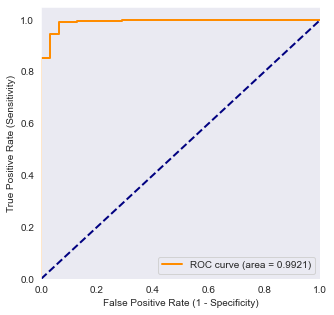

In [91]:
plt.figure(figsize=[5, 5])
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")

plt.show()

In [92]:
logit_result_new = logit_result_new.sort_values(by=['prob'], ascending=False)

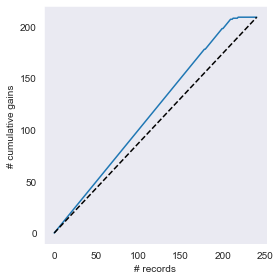

In [93]:
gainsChart(logit_result_new.actual, figsize=(4, 4))

plt.tight_layout()
plt.show()

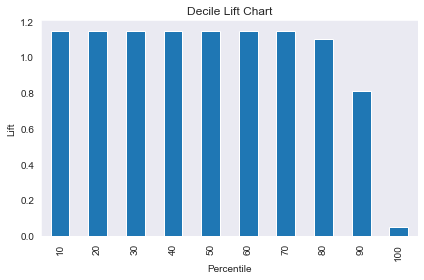

In [94]:
liftChart(logit_result_new.actual, labelBars=False)
plt.tight_layout()
plt.show()

## 4. Decison Trees

In [95]:
%matplotlib inline
import matplotlib.pylab as plt

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from dmba import plotDecisionTree, classificationSummary, regressionSummary

In [96]:
bathsoap_purchase_new2['Cluster'] = np.sign(bathsoap_purchase_new2['Cluster']) 
bathsoap_purchase_new2['Cluster'].replace([0,1], ['YES','NO'], inplace = True) 

**We have added a variable named Conscious, which contains YES/NO.According to the cluster, we have determined whether the customer cares about the price/performance ratio of the product. 
Cluster=0 (Conscious=YES) means that the customer prefers promotion and discounts and cares more about the price/performance ratio, 
while Cluster=1 (Conscious=NO) means that the customer does not care about the price/performance ratio.**

In [97]:
bathsoap_purchase_new2 = bathsoap_purchase_new2.rename(columns={'Cluster': 'Conscious'})

In [98]:
bathsoap_purchase_new2

,Conscious,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,...,Promo 6,Other Promo,Others 999,Pr Cat 1,Pr Cat 2,Pr Cat 3,Pr Cat 4,PropCat 5,PropCat 14,maxbrandpurchase
Member id,,,,,,,,,,,,,,,,,,,,,
1010010,YES,4,3,10,1,4,4,2,4,1,...,0.000,0.000,0.492,0.234,0.561,0.131,0.075,0.502,0.131,0.377
1010020,NO,3,2,10,2,2,4,4,2,1,...,0.097,0.016,0.699,0.293,0.547,0.095,0.064,0.456,0.081,0.145
1014020,NO,2,3,10,2,4,5,6,4,1,...,0.019,0.039,0.379,0.120,0.318,0.562,0.000,0.245,0.562,0.545
1014030,NO,4,0,0,0,4,0,0,5,0,...,0.000,0.000,0.000,0.000,0.400,0.600,0.000,0.400,0.600,0.600
1014190,YES,4,1,10,2,3,4,4,3,1,...,0.145,0.241,0.807,0.000,0.048,0.145,0.807,0.807,0.145,0.145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1167090,YES,2,3,10,2,4,5,5,4,1,...,0.224,0.000,0.058,0.058,0.942,0.000,0.000,0.078,0.000,0.898
1167230,NO,3,3,10,2,3,5,4,4,1,...,0.074,0.000,0.678,0.535,0.366,0.000,0.099,0.168,0.000,0.104
1167340,YES,3,3,17,2,4,4,9,4,1,...,0.000,0.000,0.558,0.170,0.649,0.180,0.000,0.623,0.180,0.247


In [99]:
bathsoap_purchase_new2.dtypes

Conscious            object
SEC                   int64
FEH                   int64
MT                    int64
SEX                   int64
AGE                   int64
EDU                   int64
HS                    int64
CHILD                 int64
CS                    int64
Affluence Index       int64
Brands#               int64
Brand Runs            int64
TotalVolume           int64
No. of  Trans         int64
Value               float64
T/BR                float64
Vol/Tran            float64
Avg. Price          float64
No Promo            float64
Promo 6             float64
Other Promo         float64
Others 999          float64
Pr Cat 1            float64
Pr Cat 2            float64
Pr Cat 3            float64
Pr Cat 4            float64
PropCat 5           float64
PropCat 14          float64
maxbrandpurchase    float64
dtype: object

In [100]:
##Set a new frame for the Desicion Tree
NewDC_df = bathsoap_purchase_new2NewDC_df = bathsoap_purchase_new2[["SEC", "FEH", "MT", "SEX", "AGE", "EDU", "HS", "CHILD",
                                                                    "CS", "Affluence Index", "Brands#", "Brand Runs", 
                                                                    "TotalVolume", "No. of  Trans", "Conscious" ]]

In [101]:
NewDC_df

,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,Affluence Index,Brands#,Brand Runs,TotalVolume,No. of Trans,Conscious
Member id,,,,,,,,,,,,,,,
1010010,4,3,10,1,4,4,2,4,1,2,3,17,8025,24,YES
1010020,3,2,10,2,2,4,4,2,1,19,5,25,13975,40,NO
1014020,2,3,10,2,4,5,6,4,1,23,5,37,23100,63,NO
1014030,4,0,0,0,4,0,0,5,0,0,2,4,1500,4,NO
1014190,4,1,10,2,3,4,4,3,1,10,3,6,8300,13,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1167090,2,3,10,2,4,5,5,4,1,15,3,5,9025,22,YES
1167230,3,3,10,2,3,5,4,4,1,29,5,23,5050,28,NO
1167340,3,3,17,2,4,4,9,4,1,13,4,19,29100,25,YES


In [102]:
predictors = ['SEC', 'FEH', 'MT', 'SEX', 'AGE', 'EDU', 'HS', 
              'CHILD', 'CS', 'Affluence Index', 'Brands#', 'Brand Runs','TotalVolume' ]
outcome = 'Conscious'

X = pd.get_dummies(NewDC_df[predictors], drop_first=True)
y = NewDC_df[outcome]

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

**Grow tree fully**

Classes: NO, YES


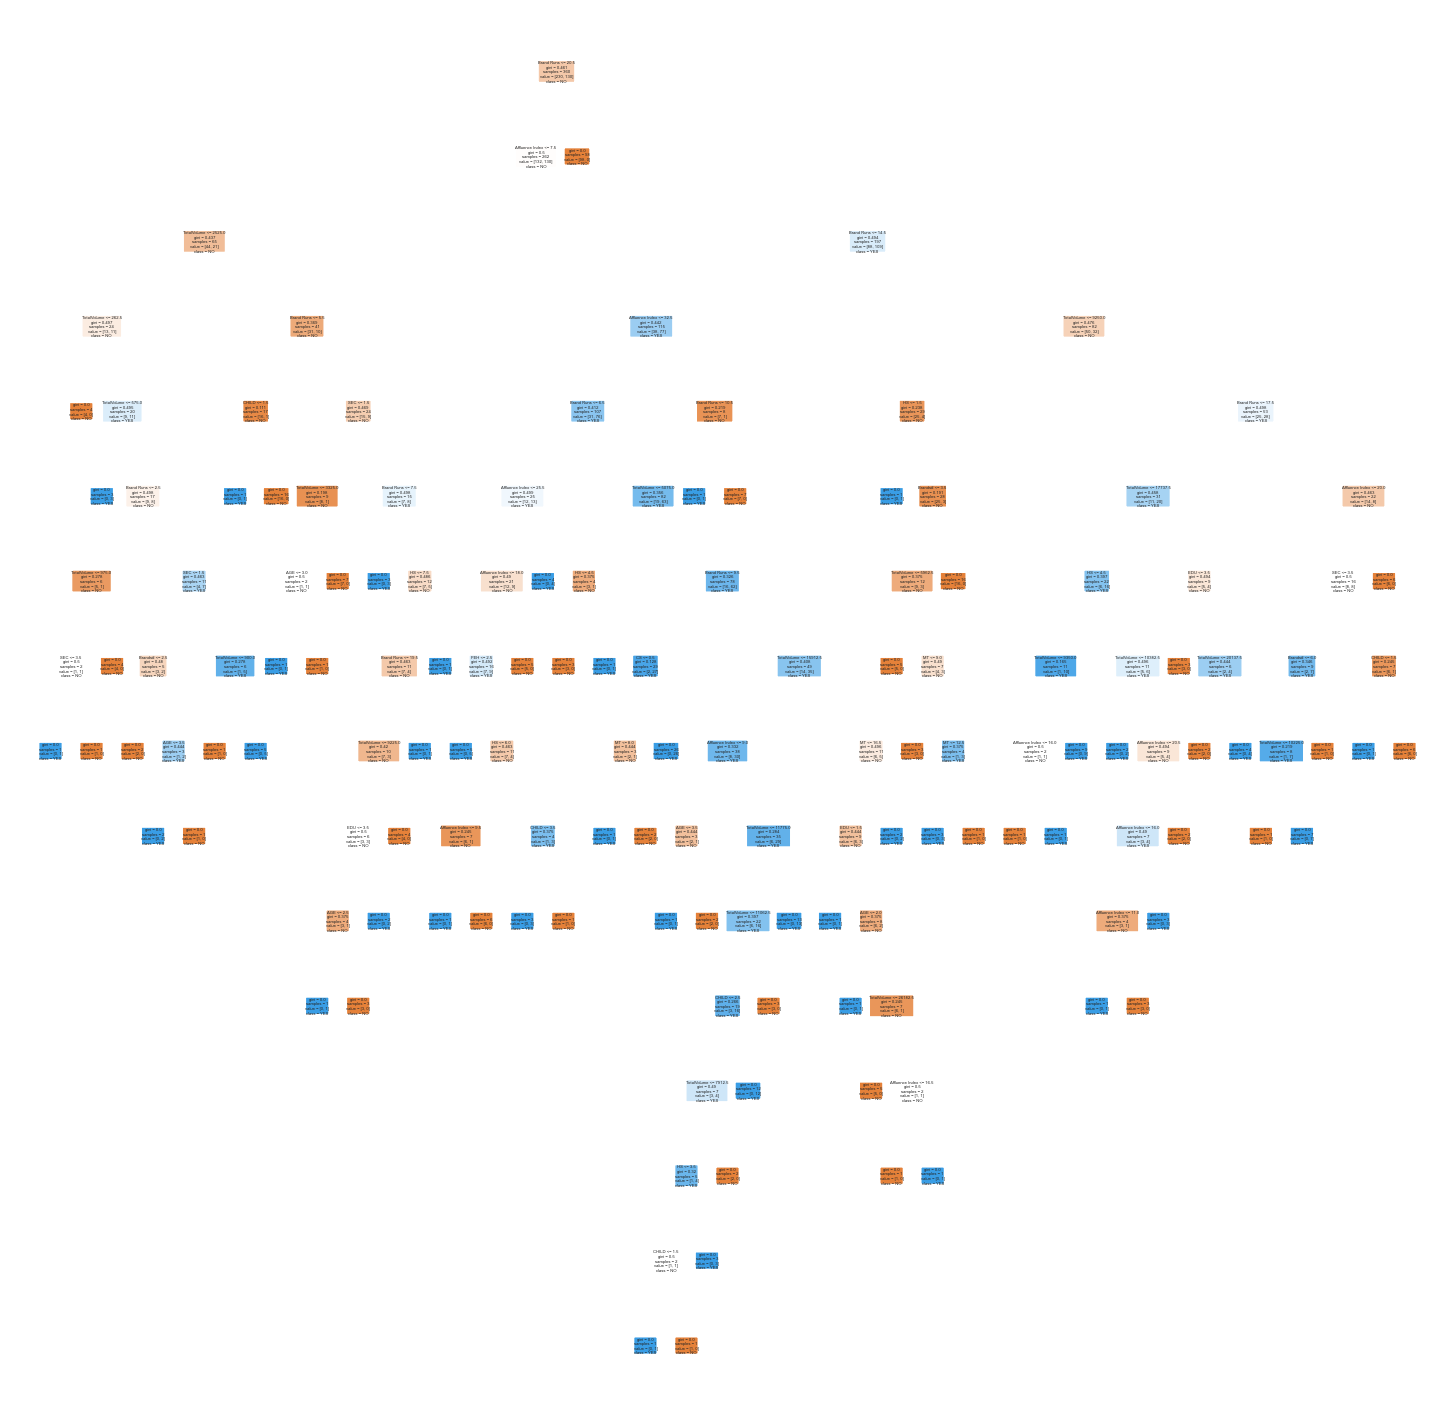

In [103]:
classTree = DecisionTreeClassifier(random_state=0)
classTree = DecisionTreeClassifier(random_state=0)
classTree.fit(X,y)

# Plot the tree
print("Classes: {}".format(', '.join(classTree.classes_)))

#fit the tree on training data
fullClassTree = DecisionTreeClassifier()
fullClassTree.fit(train_X, train_y)

#plot the tree
# Set dpi (100 - 300) to make image clearer than default

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=300)

tree.plot_tree(fullClassTree,
           feature_names = train_X.columns, 
               class_names=classTree.classes_,
           filled = True,rounded=True);
plt.show()

In [104]:
classificationSummary(train_y, fullClassTree.predict(train_X))
classificationSummary(valid_y, fullClassTree.predict(valid_X))

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual   0   1
     0 230   0
     1   0 130
Confusion Matrix (Accuracy 0.6833)

       Prediction
Actual   0   1
     0 110  40
     1  36  54


**Because the above figure is a Full tree, the Accuracy is 1. Full trees are too complex, they end up fitting noise, overfitting the data, so I will stop tree growth.**

In [105]:
# Five-fold cross-validation of the full decision tree classifier
treeClassifier = DecisionTreeClassifier()

scores = cross_val_score(treeClassifier, train_X, train_y, cv=5)
print('Accuracy scores of each fold: ', [f'{acc:.3f}' for acc in scores])

Accuracy scores of each fold:  ['0.625', '0.639', '0.653', '0.694', '0.639']


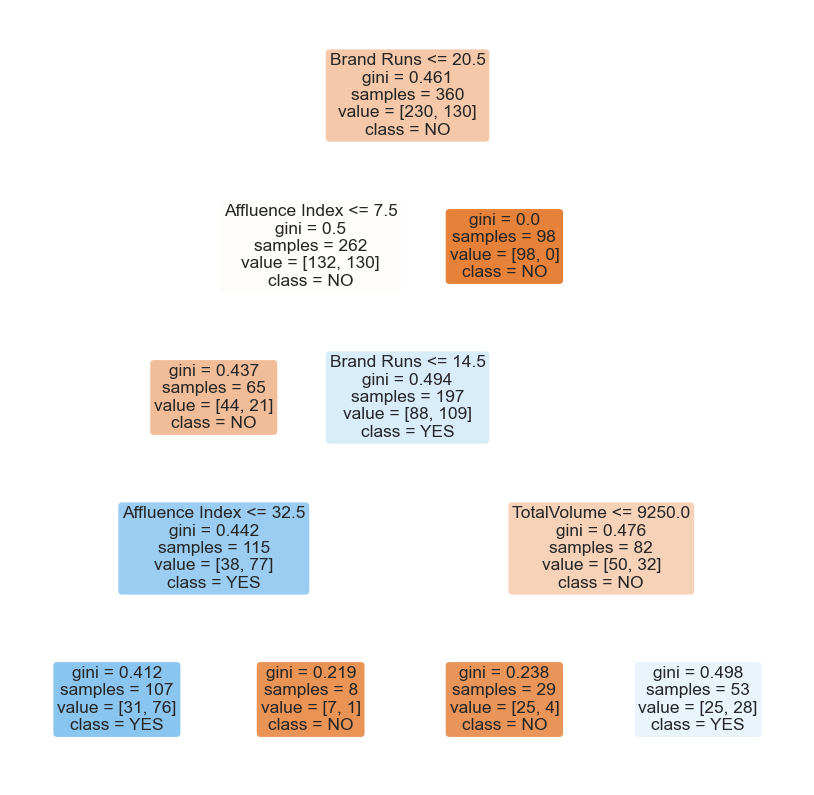

In [106]:
smallClassTree = DecisionTreeClassifier(max_depth=30, min_samples_split=20, min_impurity_decrease=0.01)
smallClassTree.fit(train_X, train_y)

#plotDecisionTree(smallClassTree, feature_names=train_X.columns)
                      # Set dpi (100 - 300) to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=200)

tree.plot_tree(smallClassTree,
           feature_names = train_X.columns, 
           class_names=classTree.classes_,
           filled = True,rounded=True);
plt.show()

In [107]:
classificationSummary(train_y, smallClassTree.predict(train_X))
classificationSummary(valid_y, smallClassTree.predict(valid_X))

Confusion Matrix (Accuracy 0.7722)

       Prediction
Actual   0   1
     0 174  56
     1  26 104
Confusion Matrix (Accuracy 0.6750)

       Prediction
Actual   0   1
     0 102  48
     1  30  60


After assessing tree performance, Accuracy has changed from 1 to 0.7722. The following will try GridsearchCV, choose tree with best performance.

**GridsearchCV**

In [108]:
# Start with an initial guess for parameters
param_grid = {
    'max_depth': [10, 20, 30, 40], 
    'min_samples_split': [20, 40, 60, 80, 100], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1) # n_jobs=-1 will utilize all available CPUs
gridSearch.fit(train_X, train_y)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

bestClassTree = gridSearch.best_estimator_

Initial score:  0.7194444444444444
Initial parameters:  {'max_depth': 10, 'min_impurity_decrease': 0.001, 'min_samples_split': 40}


In [109]:
# Adapt grid based on result from initial grid search
param_grid = {
    'max_depth': list(range(5, 10)), 
    'min_samples_split': list(range(37, 42)), 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.0011], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Improved score: ', gridSearch.best_score_)
print('Improved parameters: ', gridSearch.best_params_)

bestClassTree = gridSearch.best_estimator_

Improved score:  0.7194444444444444
Improved parameters:  {'max_depth': 8, 'min_impurity_decrease': 0, 'min_samples_split': 40}


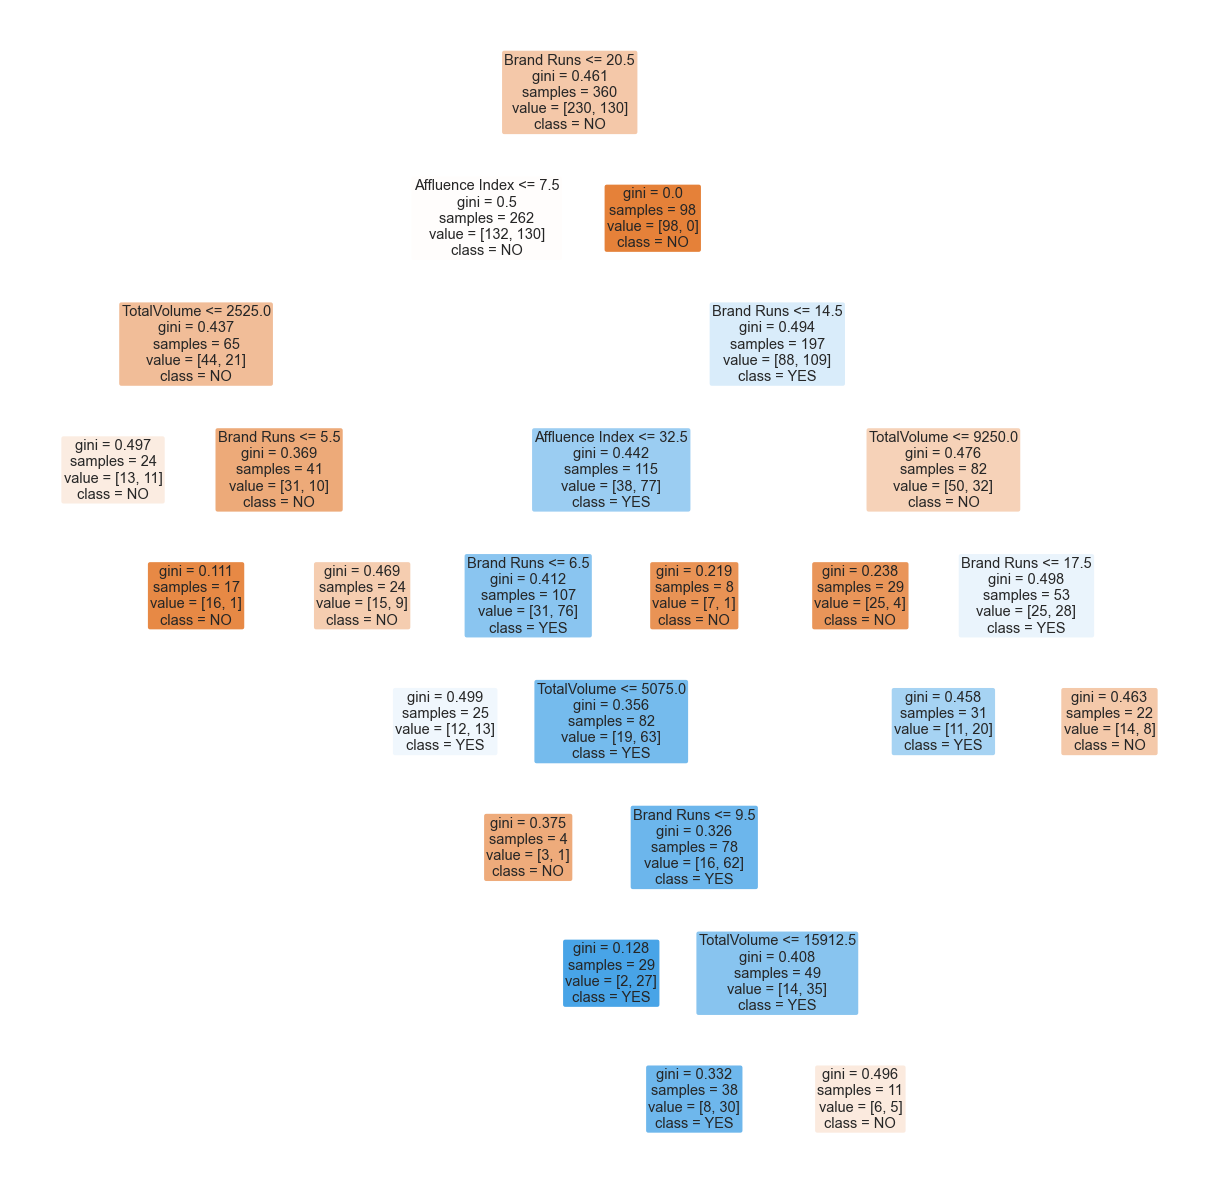

In [110]:
# Set dpi (100 - 300) to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)

tree.plot_tree(bestClassTree,
           feature_names = train_X.columns, 
           class_names=classTree.classes_,
           filled = True,rounded=True);
plt.show()

In [111]:
classificationSummary(train_y, bestClassTree.predict(train_X))
classificationSummary(valid_y, bestClassTree.predict(valid_X))

Confusion Matrix (Accuracy 0.7972)

       Prediction
Actual   0   1
     0 197  33
     1  40  90
Confusion Matrix (Accuracy 0.7042)

       Prediction
Actual   0   1
     0 118  32
     1  39  51


**After used different values for the parameters, the best performance of the tree was selected. Compared with the accuracy=0.7722 of the second tree, the accuracy=0.7972 of the final tree.**